In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline    
from sklearn.model_selection import train_test_split
from numpy import mean
from numpy import std

# **Datasets Reading** 

In [2]:
# x_train = pd.read_csv('Datasets/X_Train With Yeo Johnson 70-30.csv')

# x_test = pd.read_csv('Datasets/X_Test With Yeo Johnson 70-30.csv')

# y_train = pd.read_csv('Datasets/Y_Train With Yeo Johnson 70-30.csv')

# y_test = pd.read_csv('Datasets/Y_Test With Yeo Johnson 70-30.csv')

In [3]:
x_train = pd.read_csv('../Updated Datasets/Update X_Train With Yeo Johnson 70-30.csv')

x_test = pd.read_csv('../Updated Datasets/Update X_Test With Yeo Johnson 70-30.csv')

y_train = pd.read_csv('../Updated Datasets/Update Y_Train With Yeo Johnson 70-30.csv')

y_test = pd.read_csv('../Updated Datasets/Update Y_Test With Yeo Johnson 70-30.csv')

In [4]:
x_train

,Gender,AGE,Urea,Cr,HbA1c,Chol,TG,HDL,LDL,VLDL,BMI
0,0.896617,0.032034,-0.054052,-0.128564,-0.720501,-0.816991,-0.855640,-0.480919,-0.473748,-0.451293,-1.114137
1,0.896617,-1.966008,2.181869,1.504902,0.461613,0.264700,-0.855640,1.386073,1.596949,-0.141839,-1.114137
2,0.896617,0.531544,-0.721925,-0.496462,-0.072245,-0.044354,-0.769694,0.219203,0.250996,-0.451293,0.657481
3,-1.115304,1.930174,2.559363,2.358425,1.376799,0.496491,1.464903,0.452577,-0.266678,0.291397,1.004102
4,0.896617,0.431642,-0.402507,0.106890,2.406382,3.119648,-0.769694,0.919325,-0.163143,0.477069,1.774371
...,...,...,...,...,...,...,...,...,...,...,...
179,-1.115304,0.032034,0.178251,0.077458,-1.101829,-0.121618,-0.769694,1.386073,1.596949,-0.018057,-0.921570
180,-1.115304,-0.567379,-0.489621,-0.746633,-0.987430,0.496491,-0.254017,-0.714293,1.079275,-0.203730,-0.343869
181,0.896617,0.831251,3.582000,4.342622,0.842941,1.500918,0.691389,-0.247545,1.804019,0.043833,1.196669
182,-1.115304,0.531544,0.265365,1.254732,0.042153,-0.507936,0.175713,-0.480919,-0.577283,-0.141839,1.196669


In [5]:
print(y_train['Class'].value_counts())

2    91
0    64
1    29
Name: Class, dtype: int64


# Backward Feature Elimination using Logistic Regression

In [6]:
# from mlxtend.feature_selection import SequentialFeatureSelector as sfs
# from sklearn.linear_model import LogisticRegression

# lreg = LogisticRegression()
# sfs1 = sfs(lreg, k_features=10, forward=False, verbose=1, scoring='neg_mean_squared_error')
# sfs1 = sfs1.fit(x_train, y_train)

In [7]:
# feat_names = list(sfs1.k_feature_names_)
# print(feat_names)

In [8]:
BFE_Top_4_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c']]
BFE_Top_5_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol']]
BFE_Top_7_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL']]
BFE_Top_9_X = x_train[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL', 'BMI']]
x_train = BFE_Top_4_X

In [9]:
BFE_Top_4_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c']]
BFE_Top_5_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol']]
BFE_Top_7_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL']]
BFE_Top_9_X = x_test[['Gender', 'AGE', 'Urea', 'HbA1c', 'Chol', 'TG', 'HDL', 'VLDL', 'BMI']]
x_test = BFE_Top_4_X

In [10]:
metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict = {}
performance_dict['Metrics'] = metrics

In [11]:
metrics_grid = ["Accuracy", "Precision", "Recall", "F1 Score", "Cohen Kappa", "AUC"]

performance_dict_grid = {}
performance_dict_grid['Metrics'] = metrics_grid

# SMOTETomek Balancing

In [12]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_train)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_train_smt, y_train_smt = smtt.fit_resample(x_train, y_train)
# counter = Counter(y_train_smt)
# print('After', counter)


In [13]:

# from collections import Counter
# from imblearn.combine import SMOTETomek
# counter = Counter(y_test)
# print('Before', counter)
# smtt = SMOTETomek(random_state = 139)
# x_test_smt, y_test_smt = smtt.fit_resample(x_test, y_test)
# counter = Counter(y_test_smt)
# print('After', counter)


# Support Vector Classifier Train, Test 

In [14]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
modelSVC = SVC(probability=True)
modelSVC.fit(x_train, y_train)
#modelSVC.fit(x_test, y_test)
#print(modelSVC.score(x_test, y_test))

y_pred_svc = modelSVC.predict(x_test)
#y_pred = modelSVC.predict(x_train)
svc_acc = accuracy_score(y_test, y_pred_svc)
#ac = accuracy_score(y_train, y_pred)
print(svc_acc)

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

print(confusion_matrix(y_test, y_pred_svc))
print(classification_report(y_test, y_pred_svc))

0.875
[[29  2  1]
 [ 3  7  1]
 [ 0  3 34]]
              precision    recall  f1-score   support

           0       0.91      0.91      0.91        32
           1       0.58      0.64      0.61        11
           2       0.94      0.92      0.93        37

    accuracy                           0.88        80
   macro avg       0.81      0.82      0.82        80
weighted avg       0.88      0.88      0.88        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [15]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, modelSVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



Y_pred_svc = modelSVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_svc)
f1 = f1_score(y_test, Y_pred_svc, average = "weighted")
precision = precision_score(y_test, Y_pred_svc, average = "weighted")
recall = recall_score(y_test, Y_pred_svc, average = "weighted")

pred_prob = modelSVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8795138888888889
f1 Score  0.8770175699821323
Recall  0.875
Specificity/TNR: 0.9354838709677419
Cohen Kappa: 0.7955010224948875
AUC Score  0.9792734243904144


In [16]:
svc_performances = [svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict['SVC'] = svc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.875,
  0.8795138888888889,
  0.875,
  0.8770175699821323,
  0.7955010224948875,
  0.9792734243904144]}

# Supper Vector Classifier Hyperparameter Tuning GridSearchCV

In [17]:
from sklearn.model_selection import GridSearchCV
GSCV_SVC = GridSearchCV(modelSVC,{
    'C': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
    'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
    'kernel':['rbf', 'linear', 'poly', 'sigmoid']
}, 
cv = 10, 
return_train_score = False
)
GSCV_SVC.fit(x_train, y_train)
GSCV_SVC.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.02015033, 0.00887837, 0.01575947, 0.01246998, 0.012765  ,
        0.00927434, 0.01097004, 0.01246831, 0.01785128, 0.01057184,
        0.01376269, 0.01665502, 0.02373645, 0.01166852, 0.01545732,
        0.0181505 , 0.02164125, 0.01346257, 0.01416152, 0.0191484 ,
        0.0205441 , 0.01127002, 0.02443326, 0.01256542, 0.01416161,
        0.00967333, 0.01057122, 0.01096988, 0.01655536, 0.0111444 ,
        0.01206696, 0.02144182, 0.020245  , 0.01146851, 0.01775219,
        0.02383616, 0.01775205, 0.01257358, 0.01116896, 0.01595707,
        0.01685419, 0.01017129, 0.02692487, 0.01107037, 0.01266592,
        0.01146958, 0.01136851, 0.01077075, 0.01316395, 0.00957365,
        0.01116967, 0.01286492, 0.01665733, 0.01017489, 0.01166754,
        0.01695337, 0.01735063, 0.01017184, 0.01097028, 0.01386268,
        0.01426132, 0.00997329, 0.03021879, 0.0101716 , 0.01236629,
        0.00947442, 0.0122668 , 0.01077037, 0.01515892, 0.01116958,
        0.01136913, 0.01206713,

In [18]:
df_svc_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_svc_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020150,0.003502,0.003287,0.000781,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.947368,0.842105,...,0.789474,0.722222,0.666667,0.888889,0.777778,0.888889,0.722222,0.803509,0.083523,195
1,0.008878,0.001810,0.002093,0.000542,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.842105,...,0.894737,0.833333,0.777778,0.944444,0.888889,0.944444,0.833333,0.890643,0.065306,110
2,0.015759,0.003418,0.001594,0.000486,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.947368,0.842105,...,0.789474,0.833333,0.833333,0.888889,0.777778,1.000000,0.777778,0.853216,0.069401,143
3,0.012470,0.002106,0.002987,0.001263,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.736842,0.736842,...,0.789474,0.611111,0.666667,0.833333,0.722222,0.777778,0.722222,0.738596,0.061365,274
4,0.012765,0.001716,0.002394,0.000662,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.842105,0.833333,0.666667,0.777778,0.777778,0.777778,0.666667,0.797368,0.080694,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.016954,0.003426,0.002593,0.000489,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.736842,0.789474,...,0.842105,0.833333,0.722222,0.777778,0.777778,0.777778,0.722222,0.782164,0.043767,208
396,0.020943,0.003121,0.003092,0.000538,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.578947,0.684211,...,0.578947,0.777778,0.611111,0.611111,0.777778,0.722222,0.500000,0.647368,0.086564,295
397,0.025331,0.007791,0.003092,0.001133,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.947368,0.947368,...,0.947368,0.888889,0.777778,0.944444,0.888889,1.000000,0.833333,0.917544,0.067274,1
398,0.016156,0.001657,0.002394,0.000488,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,305


In [19]:
df_svc_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.803509
1,1,linear,0.890643
2,1,poly,0.853216
3,1,sigmoid,0.738596
4,1,rbf,0.797368
...,...,...,...
395,20,sigmoid,0.782164
396,20,rbf,0.647368
397,20,linear,0.917544
398,20,poly,0.495029


In [20]:
print(GSCV_SVC.best_score_)
gscv_svc_acc = GSCV_SVC.best_score_
print(GSCV_SVC.best_params_)

0.9175438596491228
{'C': 11, 'gamma': 1, 'kernel': 'linear'}


In [21]:
grid_predictions = GSCV_SVC.predict(x_test)

# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.97      0.98        32
           1       0.92      1.00      0.96        11
           2       0.97      0.97      0.97        37

    accuracy                           0.97        80
   macro avg       0.96      0.98      0.97        80
weighted avg       0.98      0.97      0.98        80



In [22]:
from sklearn.metrics import cohen_kappa_score, f1_score, precision_score, recall_score, roc_auc_score

cmSVC = confusion_matrix(y_test, GSCV_SVC.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmSVC[1,1]  
TN = cmSVC[0,0] 
FP = cmSVC[0,1] 
FN = cmSVC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
totalSVC=sum(sum(cmSVC))
Accuracy = (TN+TP)/totalSVC
# MCC
val = (TP * TN) - (FP * FN)
MCC_SVC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))



y_pred_svc_grid = GSCV_SVC.predict(x_test)


cohen_score = cohen_kappa_score(y_test, y_pred_svc_grid)
f1 = f1_score(y_test, y_pred_svc_grid, average = "weighted")
precision = precision_score(y_test, y_pred_svc_grid, average = "weighted")
recall = recall_score(y_test, y_pred_svc_grid, average = "weighted")

pred_prob = GSCV_SVC.predict_proba(x_test)
auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))
print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9760416666666666
f1 Score  0.9751725327812284
Recall  0.975
Specificity/TNR: 1.0
Cohen Kappa: 0.9590478628103404
AUC Score  0.9980337907537099


In [23]:
svc_performances_grid = [gscv_svc_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['SVC'] = svc_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9175438596491228,
  0.9760416666666666,
  0.975,
  0.9751725327812284,
  0.9590478628103404,
  0.9980337907537099]}

# Logistic Regression Train, Test

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

modelLR = LogisticRegression()
modelLR.fit(x_train, y_train)

y_pred_lr = modelLR.predict(x_test)
lr_ac = accuracy_score(y_test, y_pred_lr)

print("Training Accuracy: {:.3f}".format(modelLR.score(x_train, y_train)))
print("Testing Accuracy: {:.3f}".format(modelLR.score(x_test, y_test)))

print(confusion_matrix(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))

Training Accuracy: 0.891
Testing Accuracy: 0.887
[[30  1  1]
 [ 1  6  4]
 [ 0  2 35]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.67      0.55      0.60        11
           2       0.88      0.95      0.91        37

    accuracy                           0.89        80
   macro avg       0.84      0.81      0.82        80
weighted avg       0.88      0.89      0.88        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [25]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, modelLR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr = modelLR.predict(x_test)
pred_prob = modelLR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr)
f1 = f1_score(y_test, Y_pred_lr, average = "weighted")
precision = precision_score(y_test, Y_pred_lr, average = "weighted")
recall = recall_score(y_test, Y_pred_lr, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8834509408602151
f1 Score  0.8839069264069263
Recall  0.8875
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8119613476103421
AUC Score  0.9633089413308543


In [26]:
rfc_performances = [lr_ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['LR'] = rfc_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.875,
  0.8795138888888889,
  0.875,
  0.8770175699821323,
  0.7955010224948875,
  0.9792734243904144],
 'LR': [0.8875,
  0.8834509408602151,
  0.8875,
  0.8839069264069263,
  0.8119613476103421,
  0.9633089413308543]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [27]:
from sklearn import linear_model

C = np.logspace(0, 4, 10)
penalty = ['l1', 'l2']
solver = ['liblinear', 'saga']
hyperparameters = dict(C=C, penalty=penalty, solver=solver)
logistic = linear_model.LogisticRegression()
GSCV_LR = GridSearchCV(logistic, hyperparameters, cv = 10)
GSCV_LR.fit(x_train, y_train)
GSCV_LR.cv_results_

C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\babar\anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

{'mean_fit_time': array([0.00478716, 0.01226664, 0.00438797, 0.00688105, 0.00458724,
        0.01476038, 0.00418859, 0.00977359, 0.00498667, 0.01396236,
        0.00398932, 0.00937452, 0.00468702, 0.01416221, 0.00428834,
        0.01077039, 0.0050863 , 0.01495974, 0.00478678, 0.01166861,
        0.00488653, 0.01575739, 0.00478728, 0.01196754, 0.00518587,
        0.01495948, 0.00448747, 0.01196735, 0.00458701, 0.01406176,
        0.00458727, 0.01466031, 0.01595721, 0.03141625, 0.00648224,
        0.01246603, 0.00608366, 0.02483299, 0.00708063, 0.01575747]),
 'std_fit_time': array([0.00059814, 0.00118435, 0.00048867, 0.0006982 , 0.00048853,
        0.0011635 , 0.00039873, 0.00270571, 0.0007726 , 0.00063124,
        0.00063068, 0.0010169 , 0.00045729, 0.0009772 , 0.00063892,
        0.00139641, 0.00150963, 0.00118025, 0.00059809, 0.00118407,
        0.00069767, 0.0022657 , 0.00074596, 0.00118075, 0.00107406,
        0.00222974, 0.00049853, 0.00126111, 0.00048843, 0.00121748,
        0.000

In [28]:
df_lr_grid = pd.DataFrame(GSCV_SVC.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_gamma,param_kernel,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.020150,0.003502,0.003287,0.000781,1,1,rbf,"{'C': 1, 'gamma': 1, 'kernel': 'rbf'}",0.947368,0.842105,...,0.789474,0.722222,0.666667,0.888889,0.777778,0.888889,0.722222,0.803509,0.083523,195
1,0.008878,0.001810,0.002093,0.000542,1,1,linear,"{'C': 1, 'gamma': 1, 'kernel': 'linear'}",0.947368,0.842105,...,0.894737,0.833333,0.777778,0.944444,0.888889,0.944444,0.833333,0.890643,0.065306,110
2,0.015759,0.003418,0.001594,0.000486,1,1,poly,"{'C': 1, 'gamma': 1, 'kernel': 'poly'}",0.947368,0.842105,...,0.789474,0.833333,0.833333,0.888889,0.777778,1.000000,0.777778,0.853216,0.069401,143
3,0.012470,0.002106,0.002987,0.001263,1,1,sigmoid,"{'C': 1, 'gamma': 1, 'kernel': 'sigmoid'}",0.736842,0.736842,...,0.789474,0.611111,0.666667,0.833333,0.722222,0.777778,0.722222,0.738596,0.061365,274
4,0.012765,0.001716,0.002394,0.000662,1,0.1,rbf,"{'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}",0.842105,0.842105,...,0.842105,0.833333,0.666667,0.777778,0.777778,0.777778,0.666667,0.797368,0.080694,199
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,0.016954,0.003426,0.002593,0.000489,20,0.001,sigmoid,"{'C': 20, 'gamma': 0.001, 'kernel': 'sigmoid'}",0.736842,0.789474,...,0.842105,0.833333,0.722222,0.777778,0.777778,0.777778,0.722222,0.782164,0.043767,208
396,0.020943,0.003121,0.003092,0.000538,20,0.0001,rbf,"{'C': 20, 'gamma': 0.0001, 'kernel': 'rbf'}",0.578947,0.684211,...,0.578947,0.777778,0.611111,0.611111,0.777778,0.722222,0.500000,0.647368,0.086564,295
397,0.025331,0.007791,0.003092,0.001133,20,0.0001,linear,"{'C': 20, 'gamma': 0.0001, 'kernel': 'linear'}",0.947368,0.947368,...,0.947368,0.888889,0.777778,0.944444,0.888889,1.000000,0.833333,0.917544,0.067274,1
398,0.016156,0.001657,0.002394,0.000488,20,0.0001,poly,"{'C': 20, 'gamma': 0.0001, 'kernel': 'poly'}",0.473684,0.473684,...,0.473684,0.555556,0.500000,0.500000,0.500000,0.500000,0.500000,0.495029,0.023684,305


In [29]:
df_lr_grid[['param_C', 'param_kernel', 'mean_test_score']]

,param_C,param_kernel,mean_test_score
0,1,rbf,0.803509
1,1,linear,0.890643
2,1,poly,0.853216
3,1,sigmoid,0.738596
4,1,rbf,0.797368
...,...,...,...
395,20,sigmoid,0.782164
396,20,rbf,0.647368
397,20,linear,0.917544
398,20,poly,0.495029


In [30]:
print(GSCV_LR.best_score_)
gscv_lr_acc = GSCV_LR.best_score_
print(GSCV_LR.best_params_)

0.9014619883040936
{'C': 2.7825594022071245, 'penalty': 'l1', 'solver': 'saga'}


In [31]:
grid_predictions = GSCV_LR.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        32
           1       0.75      0.82      0.78        11
           2       0.92      0.95      0.93        37

    accuracy                           0.93        80
   macro avg       0.89      0.90      0.89        80
weighted avg       0.93      0.93      0.93        80



In [32]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_LR.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_lr_grid = GSCV_LR.predict(x_test)
pred_prob = GSCV_LR.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_lr_grid)
f1 = f1_score(y_test, Y_pred_lr_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_lr_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_lr_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.9291118421052632
f1 Score  0.9263721365123889
Recall  0.925
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.8769861609431061
AUC Score  0.9823424982814992


In [33]:
lr_performances_grid = [gscv_lr_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['LR'] = lr_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9175438596491228,
  0.9760416666666666,
  0.975,
  0.9751725327812284,
  0.9590478628103404,
  0.9980337907537099],
 'LR': [0.9014619883040936,
  0.9291118421052632,
  0.925,
  0.9263721365123889,
  0.8769861609431061,
  0.9823424982814992]}

# KNN Train, Test

In [34]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


modelKNN = KNeighborsClassifier() #, algorithm = 'ball_tree', weights = 'distance', metric = 'minkowski', p = 2
modelKNN.fit(x_train, y_train)
print(modelKNN.score(x_test, y_test))

# Predicting the Test set results
y_pred_knn = modelKNN.predict(x_test)
ac = accuracy_score(y_test, y_pred_knn)
print(accuracy_score(y_test, y_pred_knn))
print(confusion_matrix(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))

0.7875
0.7875
[[25  6  1]
 [ 4  6  1]
 [ 0  5 32]]
              precision    recall  f1-score   support

           0       0.86      0.78      0.82        32
           1       0.35      0.55      0.43        11
           2       0.94      0.86      0.90        37

    accuracy                           0.79        80
   macro avg       0.72      0.73      0.72        80
weighted avg       0.83      0.79      0.80        80



C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [35]:
from sklearn.metrics import cohen_kappa_score
cmKNN = confusion_matrix(y_test, modelKNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmKNN[1,1]  
TN = cmKNN[0,0] 
FP = cmKNN[0,1] 
FN = cmKNN[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalKNN = sum(sum(cmKNN))
Accuracy = (TN+TP)/totalKNN
# MCC
val = (TP * TN) - (FP * FN)
MCC_KNN = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn = modelKNN.predict(x_test)
pred_prob = modelKNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn)
f1 = f1_score(y_test, Y_pred_knn, average = "weighted")
precision = precision_score(y_test, Y_pred_knn, average = "weighted")
recall = recall_score(y_test, Y_pred_knn, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")


Precision  0.8286511156186613
f1 Score  0.803698832338292
Recall  0.7875
Specificity/TNR: 0.8064516129032258
Cohen Kappa: 0.6622796126148498
AUC Score  0.9133199055399907


In [36]:
# metrics = ["Accuracy", "Precision", "Recall", "F1 Score", "Specificity", "Cohen Kappa", "AUC"]
knn_performances = [ac, precision, recall, f1, cohen_score, auc_score ]
performance_dict['KNN'] = knn_performances

performance_dict

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.875,
  0.8795138888888889,
  0.875,
  0.8770175699821323,
  0.7955010224948875,
  0.9792734243904144],
 'LR': [0.8875,
  0.8834509408602151,
  0.8875,
  0.8839069264069263,
  0.8119613476103421,
  0.9633089413308543],
 'KNN': [0.7875,
  0.8286511156186613,
  0.7875,
  0.803698832338292,
  0.6622796126148498,
  0.9133199055399907]}

# Logistic Regression Hyperparameter Tuning GridSearchCV

In [37]:
grid_params = { 'n_neighbors' : [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}

GSCV_KNN = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv = 10, n_jobs = -1)
GSCV_KNN.fit(x_train, y_train)
GSCV_KNN.cv_results_

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


C:\Users\babar\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


{'mean_fit_time': array([0.01116974, 0.01216819, 0.01097066, 0.00877631, 0.01017225,
        0.01505957, 0.01336453, 0.01436141, 0.01505938, 0.01316471,
        0.00827789, 0.01276557, 0.0096746 , 0.01236694, 0.01863685,
        0.0099735 , 0.00897582, 0.00718067, 0.01057148, 0.00957491,
        0.01116979, 0.00887635, 0.00787866, 0.00628314, 0.01206725,
        0.01585763, 0.00917537, 0.01336422, 0.01665478, 0.01436131,
        0.01027114, 0.00588431, 0.01406159, 0.0062829 , 0.01306472,
        0.00837741, 0.01246653, 0.00588403, 0.00478702, 0.01027181,
        0.0069818 , 0.01256614, 0.00688217, 0.00738015, 0.01007316,
        0.00917537, 0.00887675, 0.00488715, 0.00678198, 0.01156902,
        0.00718052, 0.0044874 , 0.01166868, 0.00987377, 0.00728049,
        0.00897596, 0.0079783 , 0.00757964, 0.00708094, 0.00877671,
        0.01406236, 0.01087067, 0.00598423, 0.00728021, 0.00937474,
        0.00678144, 0.00907521, 0.00797858, 0.00947495, 0.00927539,
        0.01426167, 0.00867674,

In [38]:
df_lr_grid = pd.DataFrame(GSCV_KNN.cv_results_)
df_lr_grid

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_weights,params,split0_test_score,split1_test_score,...,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score
0,0.011170,0.008495,0.006383,0.002683,minkowski,1,uniform,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.947368,0.842105,...,0.842105,0.666667,0.833333,0.888889,0.944444,0.888889,0.666667,0.841520,0.095043,48
1,0.012168,0.007926,0.008676,0.009975,minkowski,1,distance,"{'metric': 'minkowski', 'n_neighbors': 1, 'wei...",0.947368,0.842105,...,0.842105,0.666667,0.833333,0.888889,0.944444,0.888889,0.666667,0.841520,0.095043,48
2,0.010971,0.013080,0.011170,0.008101,minkowski,2,uniform,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.894737,0.842105,...,0.894737,0.666667,0.722222,0.833333,0.888889,0.833333,0.722222,0.819298,0.080606,89
3,0.008776,0.005477,0.006682,0.009762,minkowski,2,distance,"{'metric': 'minkowski', 'n_neighbors': 2, 'wei...",0.947368,0.842105,...,0.842105,0.666667,0.833333,0.888889,0.944444,0.888889,0.666667,0.841520,0.095043,48
4,0.010172,0.006657,0.007181,0.002130,minkowski,3,uniform,"{'metric': 'minkowski', 'n_neighbors': 3, 'wei...",0.842105,0.842105,...,0.842105,0.833333,0.666667,0.888889,0.888889,0.888889,0.722222,0.825731,0.070080,85
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115,0.008677,0.008911,0.004089,0.002065,manhattan,18,distance,"{'metric': 'manhattan', 'n_neighbors': 18, 'we...",0.894737,0.894737,...,0.947368,0.777778,0.722222,0.888889,0.777778,0.944444,0.777778,0.852047,0.076059,15
116,0.009176,0.010323,0.005884,0.004380,manhattan,19,uniform,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.789474,0.894737,...,0.894737,0.722222,0.666667,0.888889,0.777778,0.888889,0.777778,0.814327,0.076419,93
117,0.006183,0.002985,0.014162,0.015571,manhattan,19,distance,"{'metric': 'manhattan', 'n_neighbors': 19, 'we...",0.894737,0.894737,...,0.947368,0.777778,0.666667,0.888889,0.777778,0.944444,0.777778,0.846491,0.086633,34
118,0.007481,0.005887,0.009474,0.010016,manhattan,20,uniform,"{'metric': 'manhattan', 'n_neighbors': 20, 'we...",0.789474,0.894737,...,0.894737,0.722222,0.611111,0.833333,0.777778,0.888889,0.777778,0.803216,0.084533,100


In [39]:
df_lr_grid[['param_metric', 'param_n_neighbors', 'mean_test_score']]

,param_metric,param_n_neighbors,mean_test_score
0,minkowski,1,0.841520
1,minkowski,1,0.841520
2,minkowski,2,0.819298
3,minkowski,2,0.841520
4,minkowski,3,0.825731
...,...,...,...
115,manhattan,18,0.852047
116,manhattan,19,0.814327
117,manhattan,19,0.846491
118,manhattan,20,0.803216


In [40]:
print(GSCV_KNN.best_score_)
gscv_knn_acc = GSCV_KNN.best_score_
print(GSCV_KNN.best_params_)

0.8742690058479532
{'metric': 'manhattan', 'n_neighbors': 5, 'weights': 'distance'}


In [41]:
grid_predictions = GSCV_KNN.predict(x_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.86      0.94      0.90        32
           1       0.70      0.64      0.67        11
           2       0.94      0.89      0.92        37

    accuracy                           0.88        80
   macro avg       0.83      0.82      0.83        80
weighted avg       0.88      0.88      0.87        80



In [42]:
from sklearn.metrics import cohen_kappa_score
cmRFC = confusion_matrix(y_test, GSCV_KNN.predict(x_test))

#If we use TP TN FP and FN of below's comment we get range
#FP = cmSVC.sum(axis=0) - np.diag(cmSVC)  
#FN = cmSVC.sum(axis=1) - np.diag(cmSVC)
#TP = np.diag(cmSVC)
#TN = cmSVC.sum() - (FP + FN + TP)

TP = cmRFC[1,1]  
TN = cmRFC[0,0] 
FP = cmRFC[0,1] 
FN = cmRFC[1,0] 

# Sensitivity, hit rate, recall, or true positive rate
TPR = TP/float(TP+FN)
# Specificity or true negative rate
TNR = TN/float(TN+FP) 
# Precision or positive predictive value
PPV = TP/float(TP+FP)
# Negative predictive value
NPV = TN/float(TN+FN)
# Fall out or false positive rate
FPR = FP/float(FP+TN)
# False negative rate
FNR = FN/float(TP+FN)
# False discovery rate
FDR = FP/float(TP+FP)
# Accuracy
totalRFC=sum(sum(cmRFC))
Accuracy = (TN+TP)/totalRFC
# MCC
val = (TP * TN) - (FP * FN)
MCC_RFC = val / np.sqrt((TP + FP) * (TP + FN) * (TN + FP) * (TN + FN))
# Cohen Kappa
Y_pred_knn_grid = GSCV_KNN.predict(x_test)
pred_prob = GSCV_KNN.predict_proba(x_test)


cohen_score = cohen_kappa_score(y_test, Y_pred_knn_grid)
f1 = f1_score(y_test, Y_pred_knn_grid, average = "weighted")
precision = precision_score(y_test, Y_pred_knn_grid, average = "weighted")
recall = recall_score(y_test, Y_pred_knn_grid, average = "weighted")


auc_score = roc_auc_score(y_test, pred_prob, multi_class='ovr')

print(f"Precision  {precision}")
print(f"f1 Score  {f1}")
print(f"Recall  {recall}")
specificity = TNR
print("Specificity/TNR: " + str(TNR))

print("Cohen Kappa: " + str(cohen_score))
print(f"AUC Score  {auc_score}")

Precision  0.8751785714285714
f1 Score  0.8738339552238805
Recall  0.875
Specificity/TNR: 0.967741935483871
Cohen Kappa: 0.7935483870967742
AUC Score  0.9573775423236685


In [43]:
knn_performances_grid = [gscv_knn_acc, precision, recall, f1, cohen_score, auc_score ]
performance_dict_grid['KNN'] = knn_performances_grid

performance_dict_grid

{'Metrics': ['Accuracy',
  'Precision',
  'Recall',
  'F1 Score',
  'Cohen Kappa',
  'AUC'],
 'SVC': [0.9175438596491228,
  0.9760416666666666,
  0.975,
  0.9751725327812284,
  0.9590478628103404,
  0.9980337907537099],
 'LR': [0.9014619883040936,
  0.9291118421052632,
  0.925,
  0.9263721365123889,
  0.8769861609431061,
  0.9823424982814992],
 'KNN': [0.8742690058479532,
  0.8751785714285714,
  0.875,
  0.8738339552238805,
  0.7935483870967742,
  0.9573775423236685]}

# Result of all classifiers

In [44]:
performance_df = pd.DataFrame.from_dict(performance_dict)
performance_df


,Metrics,SVC,LR,KNN
0,Accuracy,0.875000,0.887500,0.787500
1,Precision,0.879514,0.883451,0.828651
2,Recall,0.875000,0.887500,0.787500
3,F1 Score,0.877018,0.883907,0.803699
4,Cohen Kappa,0.795501,0.811961,0.662280
5,AUC,0.979273,0.963309,0.913320


# Result of all classifiers after hyperparameter tuning 

In [45]:
performance_df_grid = pd.DataFrame.from_dict(performance_dict_grid)
performance_df_grid

,Metrics,SVC,LR,KNN
0,Accuracy,0.917544,0.901462,0.874269
1,Precision,0.976042,0.929112,0.875179
2,Recall,0.975000,0.925000,0.875000
3,F1 Score,0.975173,0.926372,0.873834
4,Cohen Kappa,0.959048,0.876986,0.793548
5,AUC,0.998034,0.982342,0.957378


# Extracting Result

In [46]:
performance_df = performance_df.transpose()
performance_df.to_csv("../Final CSV With YJ/With Yeo Johnson 70-30 Applying BFE Top 4 features.csv")

performance_df_grid = performance_df_grid.transpose()
performance_df_grid.to_csv("../Final CSV With YJ/With Yeo Johnson 70-30 Applying Hyperparameter BFE Top 4 features.csv")

# ROC Curve

In [47]:
from sklearn.metrics import roc_curve

# predict probabilities
pred_prob1 = modelSVC.predict_proba(x_test)
pred_prob5 = modelLR.predict_proba(x_test)
pred_prob7 = modelKNN.predict_proba(x_test)

# roc curve for models
fpr1, tpr1, thresh1 = roc_curve(y_test, pred_prob1[:,1], pos_label = 1)
fpr5, tpr5, thresh5 = roc_curve(y_test, pred_prob5[:,1], pos_label = 1)
fpr7, tpr7, thresh7 = roc_curve(y_test, pred_prob7[:,1], pos_label = 1)

# roc curve for tpr = fpr 
random_probs = [0 for i in range(len(y_test))]
p_fpr, p_tpr, _ = roc_curve(y_test, random_probs, pos_label=1)

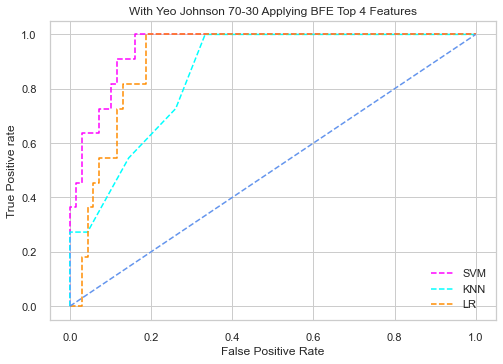

In [48]:
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')
sb.set_theme(style = 'whitegrid')

# plot roc curves
plt.plot(fpr1, tpr1, linestyle = '--', color = 'magenta', label = 'SVM')
plt.plot(fpr7, tpr7, linestyle = '--', color = 'cyan', label = 'KNN')
plt.plot(fpr5, tpr5, linestyle = '--', color = 'darkorange', label = 'LR')
plt.plot(p_fpr, p_tpr, linestyle = '--', color = 'cornflowerblue')
# title
plt.title('With Yeo Johnson 70-30 Applying BFE Top 4 Features')
# x label
plt.xlabel('False Positive Rate')
# y label
plt.ylabel('True Positive rate')

plt.legend(loc='best')
plt.savefig("../Final ROC With YJ/With Yeo Johnson 70-30 Applying BFE Top 4 Features.png", dpi=300)

plt.show();